# step 0: wrangle the vif file

### change the roman numerals to regular numbers

#### in command line:
awk '{gsub(/^chrXVI/,"16"); print}' BYxRM_segs_saccer3.bam.simplified.vcf > no_16.vcf awk '{gsub(/^chrXV/,"15"); print}' no_16.vcf > no_15.vcf awk '{gsub(/^chrXIV/,"14"); print}' no_15.vcf > no_14.vcf awk '{gsub(/^chrXIII/,"13"); print}' no_14.vcf | awk '{gsub(/^chrXII/,"12"); print}' | awk '{gsub(/^chrXI/,"11"); print}' > no_11.vcf awk '{gsub(/^chrX/,"10"); print}' no_11.vcf | awk '{gsub(/^chrIX/,"9"); print}' | awk '{gsub(/^chrVIII/,"8"); print}' > no_8.vcf awk '{gsub(/^chrVII/,"7"); print}' no_8.vcf | awk '{gsub(/^chrVI/,"6"); print}' | awk '{gsub(/^chrV/,"5"); print}' > no_5.vcf awk '{gsub(/^chrIV/,"4"); print}' no_5.vcf | awk '{gsub(/^chrIII/,"3"); print}' | awk '{gsub(/^chrII/,"2"); print}' > no_2.vcf awk '{gsub(/^chrI/,"1"); print}' no_2.vcf | awk '{gsub(/^chrM/,"M"); print}' > no_chr_final.vcf

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# step 1: Visualize genetic relatedness between the strains by performing principal component analysis and plotting the first two components.

In [ ]:
the actual pca

%%bash
plink \
  --vcf ~/qbb2020-answers/week3/hw-files/no_chr_final.vcf \
  --pca \
  --mind

checking the PCA

%%bash
head plink.eigenvec

putting the eigenvecs into a pandas dataframe

In [3]:
eigenvec= pd.read_csv('/Users/cmdb/qbb2020-answers/week3/plink.eigenvec', sep=' ', header = None)
eigenvec

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,A01,1,0.029378,0.018745,0.022175,0.044528,-0.001789,-0.050865,0.021753,0.029626,...,0.026522,0.016841,-0.006246,-0.006940,-0.018867,0.005404,-0.015076,0.033143,-0.024146,-0.031972
1,A01,2,-0.017887,-0.015345,-0.009631,-0.068047,0.059240,-0.039711,-0.029401,-0.072011,...,0.016000,0.032868,0.006906,0.002385,-0.005891,0.027033,0.018026,-0.024712,-0.012689,0.007008
2,A01,3,-0.013429,-0.014787,-0.054910,-0.038837,0.041852,-0.021421,-0.025730,0.045609,...,-0.043116,0.036535,0.006282,0.008186,-0.013674,-0.047069,0.026872,0.011978,0.018804,-0.005523
3,A01,4,0.023954,-0.069207,0.000777,0.009675,-0.022796,-0.031488,0.027907,-0.021277,...,-0.012396,-0.046710,-0.003235,-0.005111,-0.020471,-0.030723,0.015964,0.057114,-0.028091,0.053180
4,A01,5,-0.036794,0.070514,0.023257,-0.010419,-0.017322,-0.006097,-0.017309,0.006571,...,0.039460,-0.014528,0.002385,-0.015274,0.016490,0.032988,0.012756,0.025461,-0.015445,-0.031543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.026606,0.032423,0.071461,0.010042,0.034463,-0.001477,-0.002375,-0.015118,...,0.003805,0.034901,-0.033627,-0.008241,-0.002863,-0.032656,-0.028643,0.018956,-0.002176,0.023879
947,A11,93,-0.008119,-0.010684,-0.050010,-0.035384,0.048263,0.002550,-0.051717,-0.040367,...,-0.001955,-0.000349,-0.009283,-0.016167,0.001374,-0.039100,-0.017596,0.023039,-0.000226,0.025441
948,A11,94,-0.001145,0.060205,0.001088,-0.005471,0.000833,0.053251,-0.008853,0.019402,...,-0.053303,0.025990,0.066653,0.049832,-0.034562,-0.073626,-0.029021,-0.043632,-0.019187,0.065169
949,A11,95,-0.002577,0.051168,0.009742,-0.007548,-0.028898,0.052776,-0.010332,0.005138,...,-0.027829,0.045514,0.000397,-0.026079,-0.015475,-0.028324,-0.001001,0.015677,-0.021918,-0.004906


## plotting the first two components

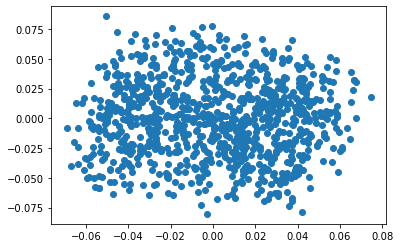

In [4]:
fig, ax = plt.subplots()
ax.scatter(x=eigenvec[2], y=eigenvec[3])

# Step 2: Visualize the allele frequency spectrum by plotting a histogram of allele frequencies.

### parsing the file to extract allele frequencies

In [16]:
vcf = open('/Users/cmdb/qbb2020-answers/week3/hw-files/no_chr_final.vcf', 'r')
AF_list = []
count = 0

for line in vcf:

    if line.startswith('#'):
        continue
    fields = line.strip('\r\n').split('\t')
    AF_temp = fields[7]
    AF_temp2= AF_temp[3:9]
    AF_list.append(AF_temp2)
    
    
print(AF_list[0:20])
vcf.close()

['0.6902', '0.7104', '0.5657', '0.5039', '0.7126', '0.7134', '0.6959', '0.4934', '0.4961', '0.5215', '0.5295', '0.5245', '0.5188', '0.5225', '0.5190', '0.5403', '0.5365', '0.5280', '0.5259', '0.5221']


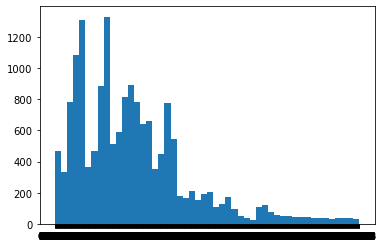

In [31]:
plt.hist(AF_list, density = False, bins = 50)


#ax.hist(AF_list[:20], bins = 10)
plt.show()

# step 3: Using plink, perform quantitative association testing for each phenotype. Use the top 10 principal components (eigenvectors) as covariates in your analysis, to adjust for non-independence due to relatedness.

had to mess with the phenotype file to make plink happy

on the command line:
awk '{gsub("_","\t"); print}' BYxRM_PhenoData.txt > pheno.txt

In [34]:
%%bash
plink --vcf ~/qbb2020-answers/week3/hw-files/no_chr_final.vcf --pheno ~/qbb2020-answers/week3/pheno.txt --linear --allow-no-sex --covar plink.eigenvec --covar-number 1-10 --all-pheno

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno /Users/cmdb/qbb2020-answers/week3/pheno.txt
  --vcf /Users/cmdb/qbb2020-answers/week3/hw-files/no_chr_final.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
799 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%

In [37]:
pheno_list = ["Cadmium", "Caffeine", "Calcium", "Cisplatin", "Cobalt", "Congo", "Copper", "Cycloheximide", "Diamide", "E6", "Ethanol," "Formamide", "Galactose", "Hydrogen", "Hydroquinone", "Hydroxyurea", "Indoleacetic", "Lactate", "Lactose", "Lithium", "Magnesium", "Maltose", "Mannose", "Menadione","Neomycin", "Paraquat", "Raffinose", "SDS", "Sorbitol", "Trehalose", "Tunicamycin", "x4-Hydroxybenzaldehyde", "x4NQO", "x5-Fluorocytosine", ",x5-Fluorouracil", "x6-Azauracil", "Xylose", "YNB", "YNB:ph3", "YNB:ph8", "YPD", "YPD:15C", "YPD:37C", "YPD:4C", "Zeocin"]

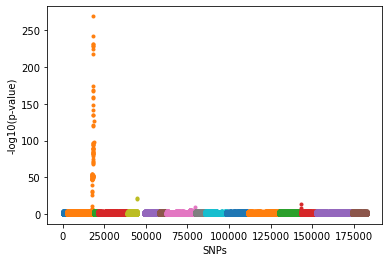

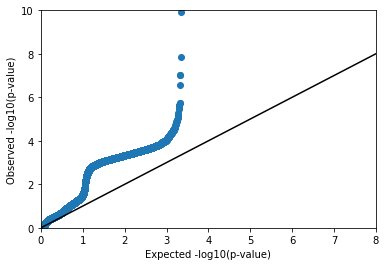

~/qbb2020-answers/week3/plink.Cadmium.assoc.linear


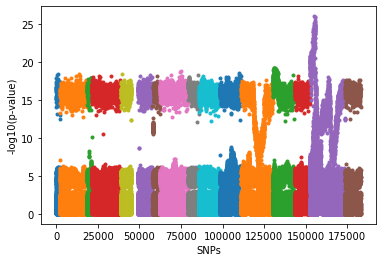

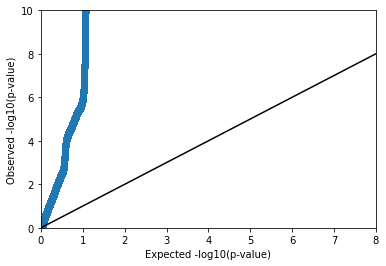

~/qbb2020-answers/week3/plink.Caffeine.assoc.linear


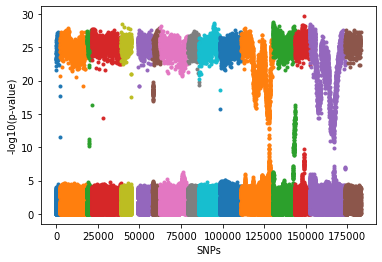

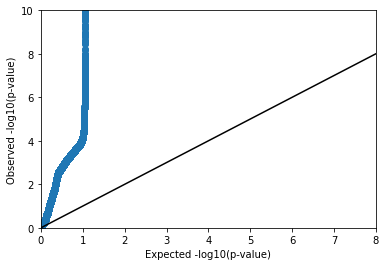

~/qbb2020-answers/week3/plink.Calcium.assoc.linear


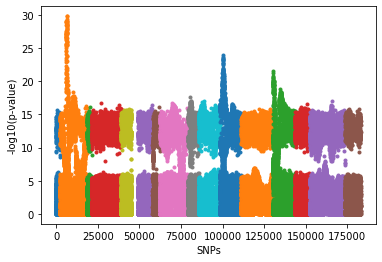

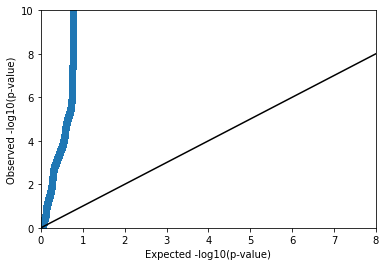

~/qbb2020-answers/week3/plink.Cisplatin.assoc.linear


<Figure size 432x288 with 0 Axes>

In [42]:

import matplotlib.pyplot as plt
plt.subplots()
fig.set_figheight(96) 
count = 0
for pheno in pheno_list:
    count +=1
    filename = '~/qbb2020-answers/week3/plink.'+ pheno + '.assoc.linear'
    gwas1 = pd.read_csv(filename, sep = "\s+")
    gwas1['logP'] = -1 * np.log10(gwas1['P'])
    gwas1['snp_index'] = range(len(gwas1))
    gwas1['snp_index'] = range(len(gwas1))

    fig, ax = plt.subplots()

    for chr in range(1, 23): 
        ax.scatter(gwas1["snp_index"][gwas1["CHR"] == chr], gwas1["logP"][gwas1["CHR"] == chr], marker = '.')

    plt.xlabel("SNPs")
    plt.ylabel("-log10(p-value)")
    
    plt.show()
    
    gwas1_sorted = gwas1.sort_values(by = "P")
    gwas1_sorted['uniform_points'] = range(0, len(gwas1_sorted))
    gwas1_sorted['uniform_pval'] = (gwas1_sorted['uniform_points'] + 1) / len(gwas1_sorted)
    gwas1_sorted['uniform_logP'] = -1 * np.log10(gwas1_sorted['uniform_pval'])
    
    gwas1['snp_index'] = range(len(gwas1))

    fig, ax = plt.subplots()

    ax.scatter(gwas1_sorted["uniform_logP"], gwas1_sorted["logP"])
    ax.plot([8,0], [8, 0], color = "black")

    plt.xlim([0, 8])
    plt.ylim([0, 10])
    plt.xlabel("Expected -log10(p-value)")
    plt.ylabel("Observed -log10(p-value)")
    
    plt.show()
  
    
    
    print(filename)
    if count >3:
        break
plt.tight_layout()
    


In [23]:
gwas1 = pd.read_csv("~/qbb2020-answers/week3/plink.P1.assoc.linear", sep = "\s+")

gwas1['logP'] = -1 * np.log10(gwas1['P'])
gwas1['snp_index'] = range(len(gwas1))
gwas1

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
0,1,.,1074,C,ADD,676,-0.6035,-1.6470,0.100100,0.999566,0
1,1,.,1074,C,COV1,676,8.7580,1.2030,0.229200,0.639785,1
2,1,.,1074,C,COV2,676,7.7320,1.0780,0.281200,0.550985,2
3,1,.,1074,C,COV3,676,-8.0200,-1.0820,0.279500,0.553618,3
4,1,.,1074,C,COV4,676,-7.2080,-0.9773,0.328800,0.483068,4
...,...,...,...,...,...,...,...,...,...,...,...
182859,16,.,942826,G,COV6,675,-20.1100,-2.7070,0.006962,2.157266,182859
182860,16,.,942826,G,COV7,675,-1.3680,-0.1812,0.856300,0.067374,182860
182861,16,.,942826,G,COV8,675,-8.9680,-1.1870,0.235800,0.627456,182861
182862,16,.,942826,G,COV9,675,-11.8100,-1.5930,0.111600,0.952336,182862


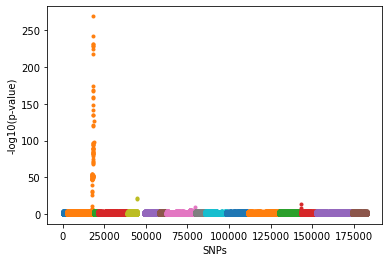

In [24]:
import matplotlib.pyplot as plt

gwas1['snp_index'] = range(len(gwas1))

fig, ax = plt.subplots()

for chr in range(1, 23): 
    ax.scatter(gwas1["snp_index"][gwas1["CHR"] == chr], gwas1["logP"][gwas1["CHR"] == chr], marker = '.')

plt.xlabel("SNPs")
plt.ylabel("-log10(p-value)")
    
plt.show()

In [27]:
gwas1_sorted = gwas1.sort_values(by = "P")
gwas1_sorted

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
18447,2,.,795756,C,ADD,706,-5.756,-58.39,5.079000e-270,269.294222,18447
18458,2,.,798782,A,ADD,713,-5.613,-52.20,9.913000e-244,243.003795,18458
18469,2,.,799317,A,ADD,707,-5.570,-50.01,1.837000e-232,231.735891,18469
18480,2,.,799991,G,ADD,712,-5.564,-49.65,1.481000e-231,230.829445,18480
18513,2,.,800746,C,ADD,720,5.513,49.06,6.023000e-230,229.220187,18513
...,...,...,...,...,...,...,...,...,...,...,...
182089,16,.,890346,T,COV6,673,NaN,NaN,NaN,NaN,182089
182090,16,.,890346,T,COV7,673,NaN,NaN,NaN,NaN,182090
182091,16,.,890346,T,COV8,673,NaN,NaN,NaN,NaN,182091
182092,16,.,890346,T,COV9,673,NaN,NaN,NaN,NaN,182092


In [28]:
gwas1_sorted['uniform_points'] = range(0, len(gwas1_sorted))
gwas1_sorted['uniform_pval'] = (gwas1_sorted['uniform_points'] + 1) / len(gwas1_sorted)
gwas1_sorted['uniform_logP'] = -1 * np.log10(gwas1_sorted['uniform_pval'])
gwas1_sorted

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index,uniform_points,uniform_pval,uniform_logP
18447,2,.,795756,C,ADD,706,-5.756,-58.39,5.079000e-270,269.294222,18447,0,0.000005,5.262128
18458,2,.,798782,A,ADD,713,-5.613,-52.20,9.913000e-244,243.003795,18458,1,0.000011,4.961098
18469,2,.,799317,A,ADD,707,-5.570,-50.01,1.837000e-232,231.735891,18469,2,0.000016,4.785007
18480,2,.,799991,G,ADD,712,-5.564,-49.65,1.481000e-231,230.829445,18480,3,0.000022,4.660068
18513,2,.,800746,C,ADD,720,5.513,49.06,6.023000e-230,229.220187,18513,4,0.000027,4.563158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182089,16,.,890346,T,COV6,673,NaN,NaN,NaN,NaN,182089,182859,0.999978,0.000009
182090,16,.,890346,T,COV7,673,NaN,NaN,NaN,NaN,182090,182860,0.999984,0.000007
182091,16,.,890346,T,COV8,673,NaN,NaN,NaN,NaN,182091,182861,0.999989,0.000005
182092,16,.,890346,T,COV9,673,NaN,NaN,NaN,NaN,182092,182862,0.999995,0.000002


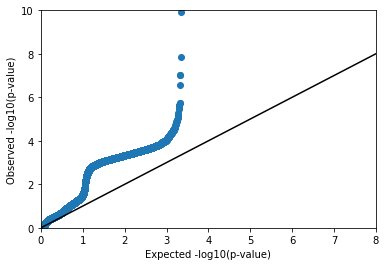

In [29]:
gwas1['snp_index'] = range(len(gwas1))

fig, ax = plt.subplots()

ax.scatter(gwas1_sorted["uniform_logP"], gwas1_sorted["logP"])
ax.plot([8,0], [8, 0], color = "black")

plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()